<a href="https://colab.research.google.com/github/tylee33/DLforFinance/blob/master/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import Series as sr, DataFrame as df
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks') 
#multiple grid styles in seaborn - whitegrid,darkgrid, white, dark, ticks
%matplotlib inline

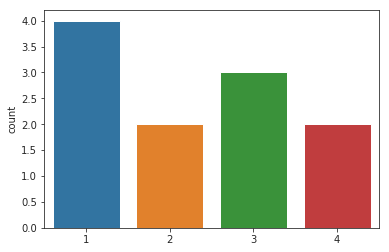

In [3]:
sns.countplot([1,2,3,4,1,2,3,4,3,1,1],data=None)
#notice the ticks on axis

# **PART 1 - STOCK DATA READING FROM YAHOO FINANCES**

In [0]:
sns.set_style('whitegrid')
#importind datareader of pandas to read from internet the stock data from microsoft,google,apple,amazon
#stock data from google-finances or yahoo-finances
import pandas_datareader.data as web
## DOCS : https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#
from datetime import datetime

In [5]:
#start and end date initialized
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)
end

datetime.datetime(2019, 5, 23, 5, 54, 1, 421389)

In [0]:
tech_list = ['AAPL','GOOG','MSFT','AMZN'] #apple,google,microsoft,amazon
#create datasets for each stock data
for stock in tech_list:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end) #create global datasets, reading from yahoo finances

In [7]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-23,188.500000,185.759995,186.350006,188.360001,20058400.0,185.535767
2018-05-24,188.839996,186.210007,188.770004,188.149994,23234000.0,185.328918
2018-05-25,189.649994,187.649994,188.229996,188.580002,17461000.0,185.752487
2018-05-29,188.750000,186.869995,187.600006,187.899994,22514100.0,185.082672
2018-05-30,188.000000,186.779999,187.720001,187.500000,18690500.0,184.688675


In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,193.570917,189.753665,191.651235,191.747052,3.230904e+07,189.972881
std,21.560278,21.282751,21.383414,21.404238,1.409514e+07,20.976705
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.039642
25%,175.934998,173.945000,174.805000,174.919998,2.275170e+07,174.248970
50%,191.970001,189.339996,190.710007,190.910004,2.871090e+07,188.461243
75%,210.089996,206.904999,208.610001,208.875000,3.868800e+07,206.743652
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


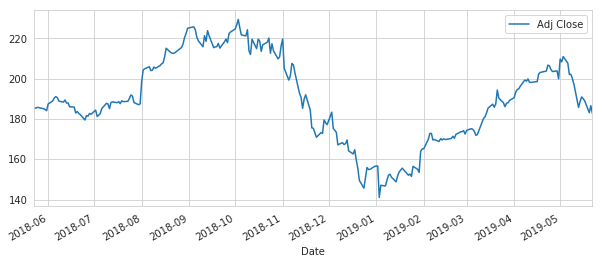

In [9]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend = True ,figsize = (10,4))

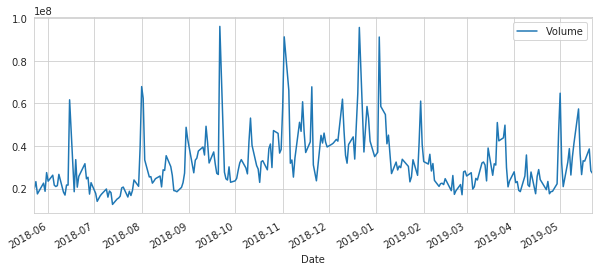

In [10]:
#total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend = True ,figsize = (10,4))

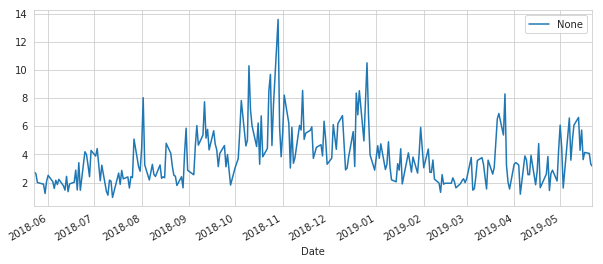

In [11]:
#variatin (High-Low of each day)
(AAPL['High']-AAPL['Low']).plot(legend=True,figsize = (10,4))

In [12]:
AAPL[AAPL.High-AAPL.Low > 4]
#note that peaks > 4 in the graph above and data below match

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-06-25,184.919998,180.729996,183.399994,182.169998,31663100.0,179.438583
2018-06-29,187.190002,182.910004,186.289993,185.110001,22737700.0,182.334488
2018-07-03,187.949997,183.539993,187.789993,183.919998,13954800.0,181.162354
2018-07-27,195.190002,190.100006,194.990005,190.979996,24024000.0,188.116501
2018-08-01,201.759995,197.309998,199.130005,201.500000,67935700.0,198.478760
2018-08-02,208.380005,200.350006,200.580002,207.389999,62404000.0,204.280457
2018-08-17,217.949997,213.160004,213.440002,217.580002,35427000.0,215.069290
2018-08-20,219.179993,215.110001,218.100006,215.460007,30287700.0,212.973755
2018-08-29,223.490005,219.410004,220.149994,222.979996,27254800.0,220.406982


In [13]:
(AAPL['High']-AAPL.Low).max() #155.190002-146.020004 on 2017-06-09 denotes the global maxima of the graph above

13.600006103515625

# **PART 2 - SIMPLE MOVING AVERAGE METHOD FOR PREDICTION**

In [0]:
ma_day = [10,20,50] #moving average for 10,20 and 50 days
for ma in ma_day : 
    col_name = "Mov. Avg. for %s days" %str(ma) 
    AAPL[col_name] = AAPL['Adj Close'].rolling(window = ma).mean() #Create 3 columns for each and computes moving average

In [17]:
AAPL.head(50)

,High,Low,Open,Close,Volume,Adj Close,Mov. Avg. for 10 days,Mov. Avg. for 20 days,Mov. Avg. for 50 days
Date,,,,,,,,,
2018-05-23,188.500000,185.759995,186.350006,188.360001,20058400.0,185.535767,NaN,NaN,NaN
2018-05-24,188.839996,186.210007,188.770004,188.149994,23234000.0,185.328918,NaN,NaN,NaN
2018-05-25,189.649994,187.649994,188.229996,188.580002,17461000.0,185.752487,NaN,NaN,NaN
2018-05-29,188.750000,186.869995,187.600006,187.899994,22514100.0,185.082672,NaN,NaN,NaN
2018-05-30,188.000000,186.779999,187.720001,187.500000,18690500.0,184.688675,NaN,NaN,NaN
2018-05-31,188.229996,186.139999,187.220001,186.869995,27482800.0,184.068115,NaN,NaN,NaN
2018-06-01,190.259995,187.750000,187.990005,190.240005,23442500.0,187.387604,NaN,NaN,NaN
2018-06-04,193.419998,191.350006,191.639999,191.830002,26266200.0,188.953751,NaN,NaN,NaN
2018-06-05,193.940002,192.360001,193.070007,193.309998,21566000.0,190.411560,NaN,NaN,NaN


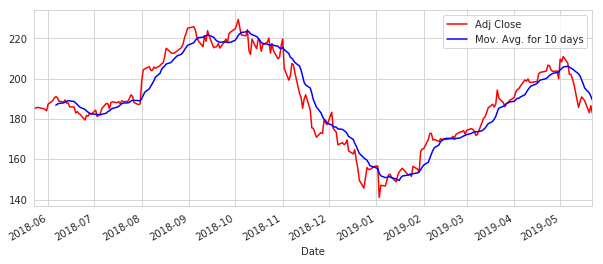

In [18]:
AAPL[['Adj Close','Mov. Avg. for 10 days']].plot(legend = True, figsize = (10,4), color = ['r','b'])

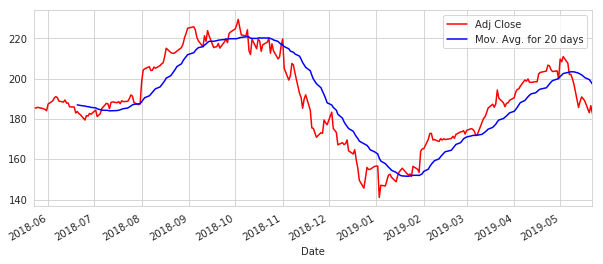

In [19]:
AAPL[['Adj Close','Mov. Avg. for 20 days']].plot(legend = True, figsize = (10,4), color = ['r','b'])

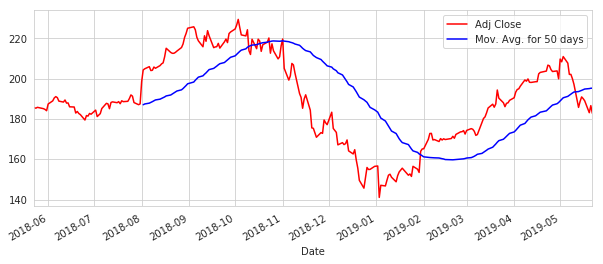

In [20]:
AAPL[['Adj Close','Mov. Avg. for 50 days']].plot(legend = True, figsize = (10,4), color = ['r','b'])

# **PART  3 - DAILY RETURN ANALYSIS**

In [21]:
AAPL['Adj Close'].pct_change().head() #using percentage change function pct_change

Date
2018-05-23         NaN
2018-05-24   -0.001115
2018-05-25    0.002285
2018-05-29   -0.003606
2018-05-30   -0.002129
Name: Adj Close, dtype: float64

In [22]:
#Calculating percentage change myself
pct_change = sr([np.NaN]*len(AAPL), index = AAPL.index)
for i in range(1,len(AAPL)):
    pct_change[i] = (AAPL['Adj Close'][i] - AAPL['Adj Close'][i-1]) / AAPL['Adj Close'][i-1]
print(pct_change.head())

Date
2018-05-23         NaN
2018-05-24   -0.001115
2018-05-25    0.002285
2018-05-29   -0.003606
2018-05-30   -0.002129
dtype: float64


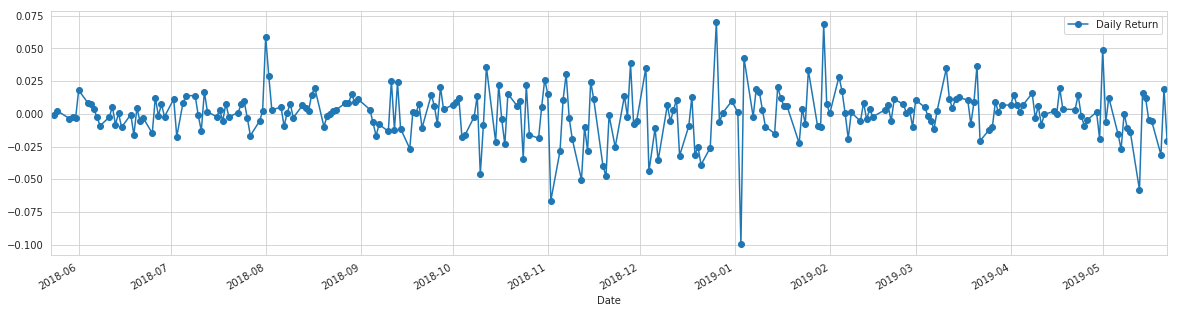

In [23]:
#plotting Daily return
AAPL['Daily Return'] = pct_change
AAPL['Daily Return'].plot(legend = True , figsize = (20,5) , marker ='o')

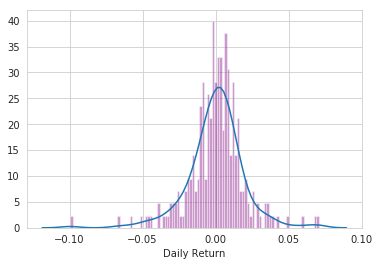

In [24]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100 , kde = True,hist_kws = {'edgecolor' : 'w', 'color' : 'purple'})

In [25]:
#Computing daily return for all four stocks
adj_close_df = df({'AAPL':AAPL['Adj Close'],'GOOG':GOOG['Adj Close'],
                   'MSFT':MSFT['Adj Close'],'AMZN':AMZN['Adj Close']})
adj_close_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-05-23,185.535767,1079.689941,97.083504,1601.859985
2018-05-24,185.328918,1079.239990,96.739098,1603.069946
2018-05-25,185.752487,1075.660034,96.788300,1610.150024
2018-05-29,185.082672,1060.319946,96.443893,1612.869995
2018-05-30,184.688675,1067.800049,97.368874,1624.890015


In [26]:
pt_change = adj_close_df.pct_change()
pt_change.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-05-23,NaN,NaN,NaN,NaN
2018-05-24,-0.001115,-0.000417,-0.003548,0.000755
2018-05-25,0.002285,-0.003317,0.000509,0.004417
2018-05-29,-0.003606,-0.014261,-0.003558,0.001689
2018-05-30,-0.002129,0.007055,0.009591,0.007453


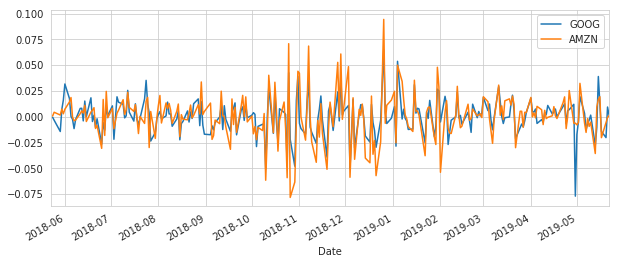

In [27]:
pt_change[['GOOG','AMZN']].plot(legend = True, figsize = (10,4))

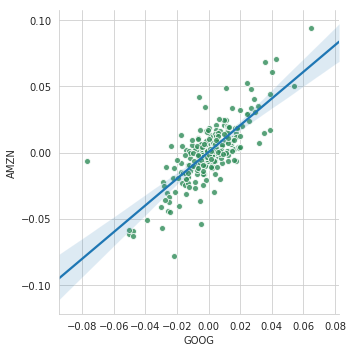

In [28]:
sns.lmplot(x='GOOG',y = 'AMZN' , data=pt_change, markers = 'o',scatter_kws = {'edgecolor' : 'w', 'color' : 'seagreen'})

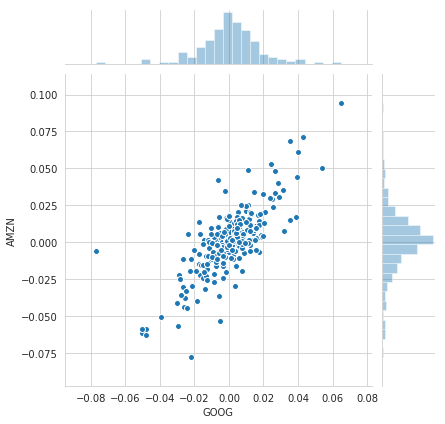

In [29]:
sns.jointplot(x='GOOG',y='AMZN', data= pt_change, marker='o',edgecolor = 'w')

**Calculating the Pearon r value (correlation coefficient)**

In [30]:
sum_x = sum_y = sum_x_y = sum_x_sq = sum_y_sq = 0
n = len(pt_change)-1
for i in range(1,n+1):
    sum_x_y = sum_x_y + pt_change.GOOG[i]*pt_change.AMZN[i]
    sum_x = sum_x + pt_change.GOOG[i]
    sum_y = sum_y + pt_change.AMZN[i]
    sum_x_sq = sum_x_sq + pt_change.GOOG[i]**2
    sum_y_sq = sum_y_sq + pt_change.AMZN[i]**2

r = (n * sum_x_y - sum_x*sum_y)/(((n*sum_x_sq-(sum_x)**2)**0.5) * ((n*sum_y_sq-(sum_y)**2)**0.5))
R = r**2
print("Pearson r : %f" %r)
print("Coefficient of determination : %f" %R)

Pearson r : 0.773694
Coefficient of determination : 0.598603


The above value and the pearson r value in the graph above are same = 0.77
This shows that GOOG and AMZN daily return are POSITIVELY CORRELATED that means, the daily returns of Amazon are dependent on Google's by 60%

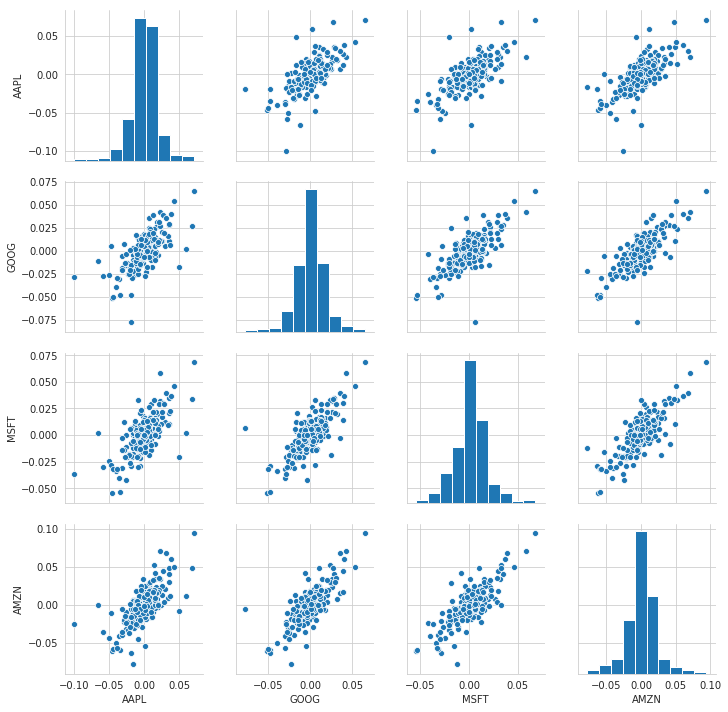

In [31]:
sns.pairplot(pt_change.dropna() , aspect = 1 ,diag_kws = {'edgecolor' : 'w' })

###seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, 
###     kind='scatter/'reg', diag_kind='hist'/'kde', markers=None, size=2.5, aspect=1, dropna=True, 
###     plot_kws=None, diag_kws=None, grid_kws=None)

##it is used for plotting joint plot for every pair of columns in dataset in a form of PairGrid

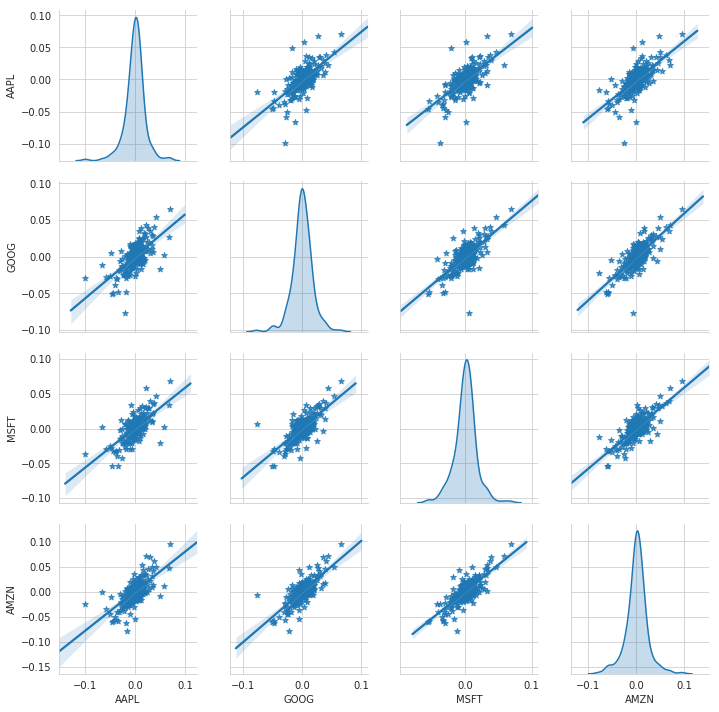

In [32]:
sns.pairplot(pt_change.dropna() , aspect = 1 , diag_kind = 'kde', kind = 'reg', markers = '*')
#s for square #d dor diamond

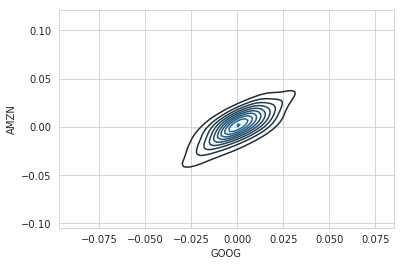

In [33]:
sns.kdeplot(pt_change.GOOG.dropna(), pt_change['AMZN'].dropna(), shade = False, legend = True)
#bivariate kernel density estimation

The pairplot can take only two values for diag_kind = 'hist' or 'kde' and two values for kind = 'scatter' or 'reg'
We can change this by using the PairGrid itself instead of pairplot (which internally uses PairGrid)

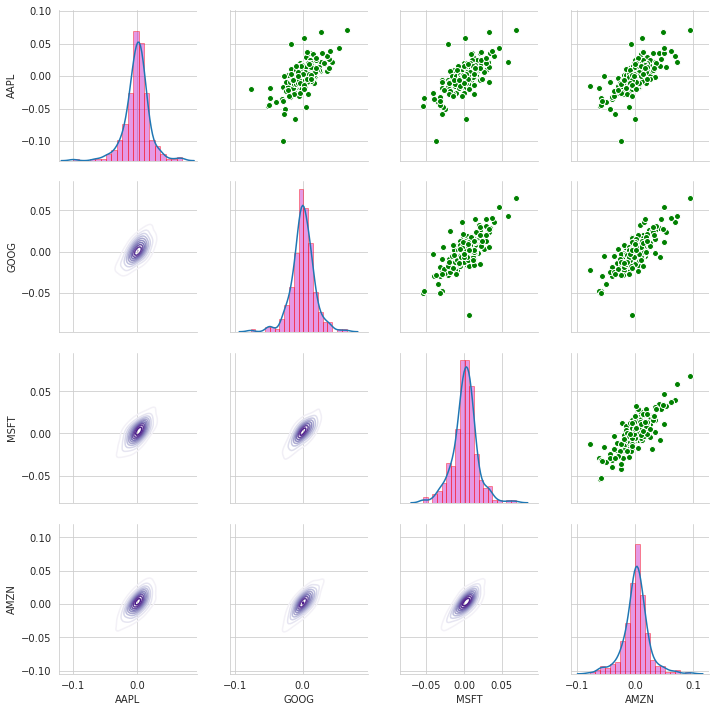

In [34]:
fig = sns.PairGrid(pt_change.dropna())
#map upper diagnol elements to plt.scatter, diagnol to distplot and lower diagnol to kdeplot
fig.map_upper(plt.scatter , edgecolor = 'w', color = 'green') 
fig.map_diag(sns.distplot, rug = False , bins = 20, hist_kws = {'edgecolor':'r', 'color':'m'})
fig.map_lower(sns.kdeplot, cmap = 'Purples')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


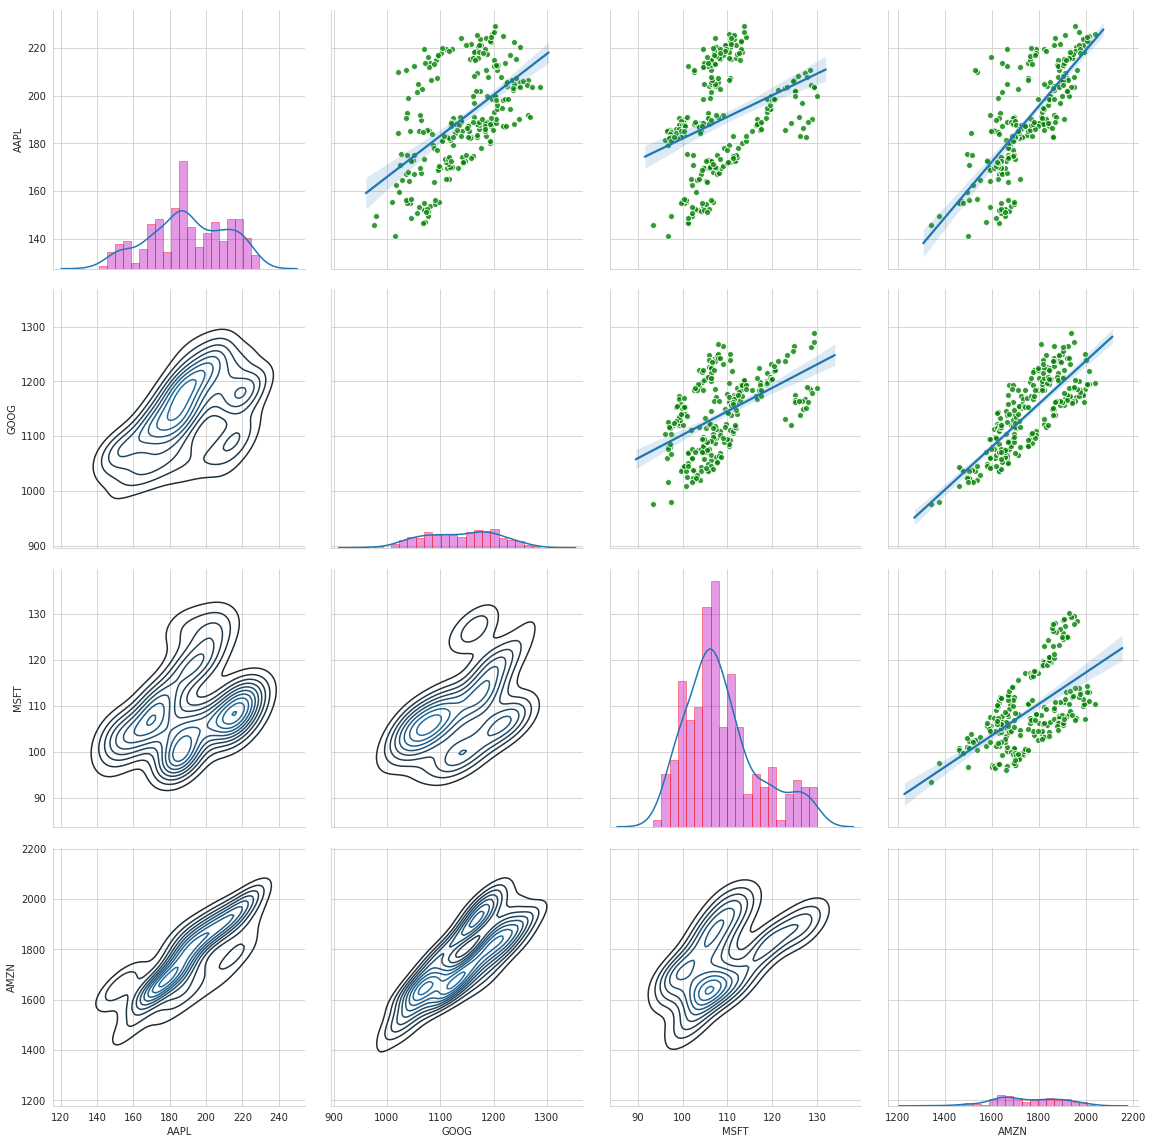

In [35]:
### PairGrid for Adjusted Closing prices
fig = sns.PairGrid(adj_close_df, size = 4, aspect =1)
#map upper diagnol elements to plt.scatter, diagnol to distplot and lower diagnol to kdeplot
fig.map_upper(sns.regplot , scatter_kws = {'edgecolor' : 'w', 'color':'g'}) 
fig.map_diag(sns.distplot, rug = False , bins = 20, hist_kws = {'edgecolor':'r', 'color':'m'})
fig.map_lower(sns.kdeplot)

In [36]:
sns.__version__

'0.9.0'

# **PART 4 - RISK ANALYSIS**

In [37]:
pt_change.std()

AAPL    0.019243
GOOG    0.016860
MSFT    0.016178
AMZN    0.022020
dtype: float64

In [38]:
##Code for std -- just for fun!
var = 0
for i in range(1,len(pt_change)):
    var = var + (pt_change.ix[i] - pt_change.mean())**2
sd = (var / (len(pt_change)-2)) ** 0.5 ##Computing standard deviantion by dividing by n-1 and not n as it is a sample
sd
##values below match exactly above

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


AAPL    0.019243
GOOG    0.016860
MSFT    0.016178
AMZN    0.022020
dtype: float64

AAPL   0.00012592530095837518   0.019242758986657293
GOOG   0.00039935534015361453   0.016859868437148682
MSFT   0.0012263355125737094   0.01617827316649601
AMZN   0.0008386985726336929   0.022020277814722048


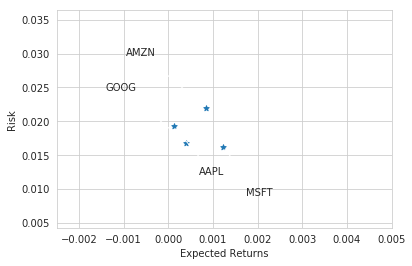

In [39]:
rets = pt_change.dropna()
area = np.pi *10
plt.scatter(rets.mean(),rets.std(), s =area , marker = '*') ## s is the area of the scatter point
plt.xlim([-0.0025,0.0050])
#plt.ylim([0.005,0.0020])
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
k=0
##Set annotation with text, arrows, boxes and many more on the plot
### check out http://matplotlib.org/users/annotations_guide.html
for (label, x, y) in zip(rets.columns,rets.mean(),rets.std()): ##zip function zips the data to make it iteratable 
    print(label," ",x," ",y)
    plt.annotate(label, xy = (x, y), xytext = ((-1)**k*50,(-1)**(k+1)*50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3'))
    k+=1

# **PART 5 - VALUE AT RISK**

**METHOD 1 - BOOTSTRAP METHOD**

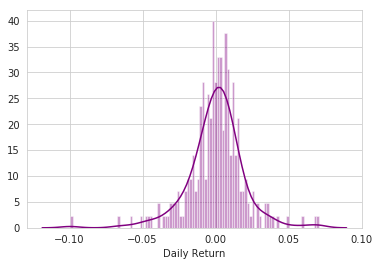

In [40]:
sns.distplot(AAPL['Daily Return'].dropna() , color = 'purple', bins = 100)

In [41]:
AAPL['Daily Return'].quantile(0.05) ## 5 % quantile range
## 5% probability that daily return will be less than -1.5%

-0.031234672863473676

**METHOD 2 - MONTE CARLO METHOD USING GEOMETRIC BROWNIAN MOTION MODEL**

In [0]:
days = 365
dt = 1/days 

mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

def monte_carlo(start_price, days , mu, sigma):
    price = np.zeros(days)
    drift = np.zeros(days)
    shock = np.zeros(days)

    price[0] = start_price

    for i in range(1,days):
        drift[i] = mu * dt
        shock[i] = np.random.normal(loc = mu*dt , scale = sigma*np.sqrt(dt))
        price[i] = price[i-1] + price[i-1]*(drift[i]+shock[i])
    
    return price

In [43]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-23,1080.780029,1061.709961,1065.130005,1079.689941,1030000,1079.689941
2018-05-24,1080.469971,1066.150024,1079.000000,1079.239990,766800,1079.239990
2018-05-25,1082.560059,1073.775024,1079.020020,1075.660034,899400,1075.660034
2018-05-29,1073.369995,1055.219971,1064.890015,1060.319946,1865100,1060.319946
2018-05-30,1069.209961,1056.829956,1063.030029,1067.800049,1138500,1067.800049


Text(0.5, 1.0, 'Monte Carlo for GOOGLE')

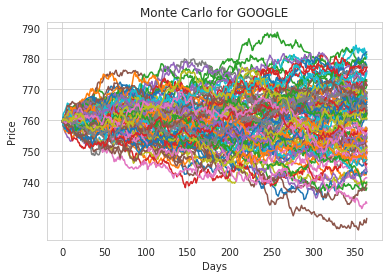

In [44]:
start_price  = 759.659973

for trials in range(1,100):
    plt.plot(monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo for GOOGLE')

In [0]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = monte_carlo(start_price,days,mu,sigma)[days-1];

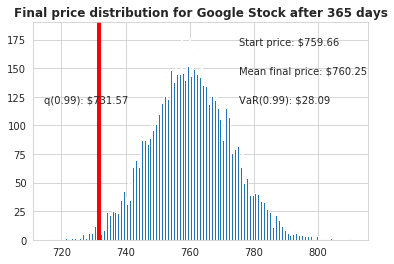

In [46]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, "Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title("Final price distribution for Google Stock after %s days" % days, weight='bold');